# SVM - Support Vector Machine

Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ipynb.fs.defs.Additional_metrics import *
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import time

## Trained on 30% samples of the original training dataset

In [2]:
train_data = pd.read_csv("../datasets/fashion-mnist_train.csv")
X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]

test_data = pd.read_csv("../datasets/fashion-mnist_test.csv")
X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]

X_train_std = (X_train - X_train.mean())/X_train.std()
X_test_std = (X_test - X_test.mean())/X_test.std()

In [3]:
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_train_std, y_train, test_size=0.7, stratify=y_train, random_state=42)

In [4]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
i = 0

for c in [0.1, 0.5, 1, 3, 5, 7, 10, 13, 15, 20, 50]:
    for k in ["linear", "poly", "rbf", "sigmoid"]:
        for g in ["scale", "auto"]:
            
            indexes = kf.split(X_train_30, y_train_30)
            acc_tmp = []
            time_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y_train_30)),len(np.unique(y_train_30))))

            for train_index, test_index in indexes:

                X_trainCV1 = X_train_30.iloc[train_index,:]
                y_trainCV1 = y_train_30.iloc[train_index]

                X_testCV1 = X_train_30.iloc[test_index,:]
                y_testCV1 = y_train_30.iloc[test_index]

                start = time.time()

                classifier1 = SVC(C = c, kernel = k, gamma = g)
                
                classifier1.fit(X_trainCV1, y_trainCV1)
                y_pred1 = classifier1.predict(X_testCV1)
                c1 = confusion_matrix(y_testCV1, y_pred1)

                acc_tmp.append(np.trace(c1)/sum(sum(c1)))
                fin_conf_mat += c1
                end = time.time()

                time_tmp.append(end-start)
                
            print(i,'. C = ', c,', k = ', k,', g = ', g, ', Average accuracy: ', round(np.mean(acc_tmp),8),' | Average execution time: ', round(np.mean(time_tmp),8), sep='')
            acc.append(np.mean(acc_tmp))
            i += 1
            
    print('')
      
print('-------------------')
print('Best accuracy is in iteration number: ', np.argmax(acc))

0. C = 0.1, k = linear, g = scale, Average accuracy: 0.8315 | Average execution time: 25.56690488
1. C = 0.1, k = linear, g = auto, Average accuracy: 0.8315 | Average execution time: 25.33558207
2. C = 0.1, k = poly, g = scale, Average accuracy: 0.74744444 | Average execution time: 74.97802382
3. C = 0.1, k = poly, g = auto, Average accuracy: 0.74605556 | Average execution time: 72.80494447
4. C = 0.1, k = rbf, g = scale, Average accuracy: 0.80883333 | Average execution time: 57.08916502
5. C = 0.1, k = rbf, g = auto, Average accuracy: 0.80883333 | Average execution time: 56.94263134
6. C = 0.1, k = sigmoid, g = scale, Average accuracy: 0.778 | Average execution time: 47.30105567
7. C = 0.1, k = sigmoid, g = auto, Average accuracy: 0.77855556 | Average execution time: 47.17865348

8. C = 0.5, k = linear, g = scale, Average accuracy: 0.81616667 | Average execution time: 30.54219766
9. C = 0.5, k = linear, g = auto, Average accuracy: 0.81616667 | Average execution time: 30.45532269
10. C

83. C = 50, k = poly, g = auto, Average accuracy: 0.87538889 | Average execution time: 31.66601486
84. C = 50, k = rbf, g = scale, Average accuracy: 0.87538889 | Average execution time: 35.80639367
85. C = 50, k = rbf, g = auto, Average accuracy: 0.87544444 | Average execution time: 35.70130062
86. C = 50, k = sigmoid, g = scale, Average accuracy: 0.70622222 | Average execution time: 18.77048502
87. C = 50, k = sigmoid, g = auto, Average accuracy: 0.70661111 | Average execution time: 18.65818286

-------------------
Best accuracy is in iteration number:  45


#### Checking if other parameters speed up the process

In [9]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for dfs in ["ovo", "ovr"]:
    for s in [True, False]:
            
        indexes = kf.split(X_train_30, y_train_30)
        acc_tmp = []
        time_tmp = []
        fin_conf_mat = np.zeros((len(np.unique(y_train_30)),len(np.unique(y_train_30))))

        for train_index, test_index in indexes:

            X_trainCV1 = X_train_30.iloc[train_index,:]
            y_trainCV1 = y_train_30.iloc[train_index]

            X_testCV1 = X_train_30.iloc[test_index,:]
            y_testCV1 = y_train_30.iloc[test_index]

            start = time.time()

            classifier1 = SVC(C = 7, kernel = "rbf", gamma = "auto", shrinking = s, decision_function_shape = dfs)
                
            classifier1.fit(X_trainCV1, y_trainCV1)
            y_pred1 = classifier1.predict(X_testCV1)
            c1 = confusion_matrix(y_testCV1, y_pred1)

            acc_tmp.append(np.trace(c1)/sum(sum(c1)))
            fin_conf_mat += c1
            end = time.time()

            time_tmp.append(end-start)            
      
        print(dfs, ', ', s, ', Average accuracy: ', round(np.mean(acc_tmp),8),' | Average execution time: ', round(np.mean(time_tmp),8), sep='')

ovo, True, Average accuracy: 0.88233333 | Average execution time: 36.50343242
ovo, False, Average accuracy: 0.88233333 | Average execution time: 36.60518813
ovr, True, Average accuracy: 0.88233333 | Average execution time: 35.72732687
ovr, False, Average accuracy: 0.88233333 | Average execution time: 36.15811472


In [10]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for c in [6,7,8,9]:
            
    indexes = kf.split(X_train_30, y_train_30)
    acc_tmp = []
    time_tmp = []
    fin_conf_mat = np.zeros((len(np.unique(y_train_30)),len(np.unique(y_train_30))))

    for train_index, test_index in indexes:

        X_trainCV1 = X_train_30.iloc[train_index,:]
        y_trainCV1 = y_train_30.iloc[train_index]

        X_testCV1 = X_train_30.iloc[test_index,:]
        y_testCV1 = y_train_30.iloc[test_index]

        start = time.time()

        classifier1 = SVC(C = c, kernel = "rbf", gamma = "auto", decision_function_shape = "ovr")
                
        classifier1.fit(X_trainCV1, y_trainCV1)
        y_pred1 = classifier1.predict(X_testCV1)
        c1 = confusion_matrix(y_testCV1, y_pred1)

        acc_tmp.append(np.trace(c1)/sum(sum(c1)))
        fin_conf_mat += c1
        end = time.time()

        time_tmp.append(end-start)
                
      
    print(c,', Average accuracy: ', round(np.mean(acc_tmp),8),' | Average execution time: ', round(np.mean(time_tmp),8), sep='')

6, Average accuracy: 0.8815 | Average execution time: 35.65365705
7, Average accuracy: 0.88233333 | Average execution time: 35.67667618
8, Average accuracy: 0.88177778 | Average execution time: 35.64464703
9, Average accuracy: 0.88166667 | Average execution time: 35.76155334


#### Training on 30% training samples, test on test dataset

In [4]:
start = time.time()

classifier1 = SVC(C = 7, kernel = "rbf", gamma = "auto", decision_function_shape = "ovr")
classifier1.fit(X_train_30, y_train_30)
y_pred2 = classifier1.predict(X_test_std)
c2 = confusion_matrix(y_test, y_pred2, labels=[0,1,2,3,4,5,6,7,8,9])
    
end = time.time()
print('Accuracy without reduction:' , np.trace(c2)/sum(sum(c2)), '| Average execution time: ', end - start)

Accuracy without reduction: 0.888 | Average execution time:  77.5147635936737


## Trained on 100% samples of the original training dataset

In [5]:
train_data = pd.read_csv("../datasets/fashion-mnist_train.csv")
X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]

test_data = pd.read_csv("../datasets/fashion-mnist_test.csv")
X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]

X_train_std = (X_train - X_train.mean())/X_train.std()
X_test_std = (X_test - X_test.mean())/X_test.std()

In [6]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
     
indexes = kf.split(X_train, y_train)
acc_tmp = []
time_tmp = []
fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))

for train_index, test_index in indexes:
    
    X_trainCV2 = X_train_std.iloc[train_index,:]
    y_trainCV2 = y_train.iloc[train_index]
    
    X_testCV2 = X_train_std.iloc[test_index,:]
    y_testCV2 = y_train.iloc[test_index]

    start = time.time()

    classifier2 = SVC(C = 7, kernel = "rbf", gamma = "auto", decision_function_shape = "ovr")
    classifier2.fit(X_trainCV2, y_trainCV2) 
    y_pred3 = classifier2.predict(X_testCV2)
    c3 = confusion_matrix(y_testCV2, y_pred3)

    acc_tmp.append(np.trace(c3)/sum(sum(c3)))
    fin_conf_mat += c3
    end = time.time()

    time_tmp.append(end-start)
    print("        Accuracy: ", np.trace(c3)/sum(sum(c3)),'| Execution time:',end - start)
    
print("")    
print('-------------------')
print('Average accuracy:', np.mean(acc_tmp),'| Average execution time:',np.mean(time_tmp))   

        Accuracy:  0.9030833333333333 | Execution time: 316.11776876449585
        Accuracy:  0.8989166666666667 | Execution time: 314.11491560935974
        Accuracy:  0.9021666666666667 | Execution time: 316.84443068504333
        Accuracy:  0.9018333333333334 | Execution time: 313.863707780838
        Accuracy:  0.9011666666666667 | Execution time: 312.4174003601074

-------------------
Average accuracy: 0.9014333333333333 | Average execution time: 314.67164463996886


##### Training on 100% training samples, test on test dataset

In [7]:
start = time.time()

classifier2 = SVC(C = 7, kernel = "rbf", gamma = "auto", decision_function_shape = "ovr")
classifier2.fit(X_train_std, y_train)
y_pred4 = classifier2.predict(X_test_std)
c4 = confusion_matrix(y_test, y_pred4, labels=[0,1,2,3,4,5,6,7,8,9])
                      
end = time.time()
print('Accuracy without reduction:', np.trace(c4)/sum(sum(c4)), '| Execution time:', end - start)

Accuracy without reduction: 0.9076 | Execution time: 411.97203731536865


.

## Trained on 100% samples with PCA reduction

In [4]:
train_data = pd.read_csv("../datasets/fashion-mnist_train.csv")
X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]

test_data = pd.read_csv("../datasets/fashion-mnist_test.csv")
X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]

X_train_std = (X_train - X_train.mean())/X_train.std()
X_test_std = (X_test - X_test.mean())/X_test.std()

In [5]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
i = 0

for c in [0.1, 0.5, 1, 3, 5, 7]:
    for k in ["linear", "poly", "rbf"]:
        for g in ["scale", "auto"]:
    
            indexes = kf.split(X_train, y_train)
            acc_tmp = []
            time_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))

            for train_index, test_index in indexes:

                X_trainCV3 = X_train_std.iloc[train_index,:]
                y_trainCV3 = y_train.iloc[train_index]

                X_testCV3 = X_train_std.iloc[test_index,:]
                y_testCV3 = y_train.iloc[test_index]

                pca = PCA(n_components=0.9)
                pca.fit(X_trainCV3)
                X_train_r = pca.transform(X_trainCV3)
                X_test_r = pca.transform(X_testCV3)

                start = time.time()

                classifier3 = SVC(C = c, kernel = k, gamma = g)
                classifier3.fit(X_train_r, y_trainCV3) 
                y_pred5 = classifier3.predict(X_test_r)
                c5 = confusion_matrix(y_testCV3, y_pred5, labels=[0,1,2,3,4,5,6,7,8,9])

                acc_tmp.append(np.trace(c5)/sum(sum(c5)))
                fin_conf_mat += c5
                end = time.time()

                time_tmp.append(end-start)

            print(i,'. C = ', c,', k = ', k,', g = ', g, ', Average accuracy: ', round(np.mean(acc_tmp),8),' | Average execution time: ', round(np.mean(time_tmp),8), sep='')
            acc.append(np.mean(acc_tmp))
            i += 1
            
    print('')
      
print('-------------------')
print('Best accuracy is in iteration number: ', np.argmax(acc))

0. C = 0.1, k = linear, g = scale, Average accuracy: 0.8605 | Average execution time: 76.25441227
1. C = 0.1, k = linear, g = auto, Average accuracy: 0.8605 | Average execution time: 76.56389918
2. C = 0.1, k = poly, g = scale, Average accuracy: 0.81805 | Average execution time: 139.53207159
3. C = 0.1, k = poly, g = auto, Average accuracy: 0.89656667 | Average execution time: 57.4282763
4. C = 0.1, k = rbf, g = scale, Average accuracy: 0.84796667 | Average execution time: 122.2841609
5. C = 0.1, k = rbf, g = auto, Average accuracy: 0.79711667 | Average execution time: 240.55978909

6. C = 0.5, k = linear, g = scale, Average accuracy: 0.86011667 | Average execution time: 139.73663702
7. C = 0.5, k = linear, g = auto, Average accuracy: 0.86011667 | Average execution time: 141.70741401
8. C = 0.5, k = poly, g = scale, Average accuracy: 0.8647 | Average execution time: 97.35882421
9. C = 0.5, k = poly, g = auto, Average accuracy: 0.89428333 | Average execution time: 60.59916253
10. C = 0.

In [4]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
i = 0

for c in [7, 10, 13]:
    for k in ["poly", "rbf"]:
        for g in ["scale", "auto"]:
    
            indexes = kf.split(X_train, y_train)
            acc_tmp = []
            time_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))

            for train_index, test_index in indexes:

                X_trainCV3 = X_train_std.iloc[train_index,:]
                y_trainCV3 = y_train.iloc[train_index]

                X_testCV3 = X_train_std.iloc[test_index,:]
                y_testCV3 = y_train.iloc[test_index]

                pca = PCA(n_components=0.9)
                pca.fit(X_trainCV3)
                X_train_r = pca.transform(X_trainCV3)
                X_test_r = pca.transform(X_testCV3)

                start = time.time()

                classifier3 = SVC(C = c, kernel = k, gamma = g)
                classifier3.fit(X_train_r, y_trainCV3) 
                y_pred5 = classifier3.predict(X_test_r)
                c5 = confusion_matrix(y_testCV3, y_pred5, labels=[0,1,2,3,4,5,6,7,8,9])

                acc_tmp.append(np.trace(c5)/sum(sum(c5)))
                fin_conf_mat += c5
                end = time.time()

                time_tmp.append(end-start)

            print(i,'. C = ', c,', k = ', k,', g = ', g, ', Average accuracy: ', round(np.mean(acc_tmp),8),' | Average execution time: ', round(np.mean(time_tmp),8), sep='')
            acc.append(np.mean(acc_tmp))
            i += 1
            
    print('')
      
print('-------------------')
print('Best accuracy is in iteration number: ', np.argmax(acc))

0. C = 7, k = poly, g = scale, Average accuracy: 0.89396667 | Average execution time: 62.72543297
1. C = 7, k = poly, g = auto, Average accuracy: 0.88501667 | Average execution time: 63.6843348
2. C = 7, k = rbf, g = scale, Average accuracy: 0.89926667 | Average execution time: 76.75362473
3. C = 7, k = rbf, g = auto, Average accuracy: 0.87815 | Average execution time: 190.43904781

4. C = 10, k = poly, g = scale, Average accuracy: 0.89563333 | Average execution time: 61.03752699
5. C = 10, k = poly, g = auto, Average accuracy: 0.8849 | Average execution time: 64.20340691
6. C = 10, k = rbf, g = scale, Average accuracy: 0.90021667 | Average execution time: 76.47416992
7. C = 10, k = rbf, g = auto, Average accuracy: 0.87788333 | Average execution time: 193.35125151

8. C = 13, k = poly, g = scale, Average accuracy: 0.89641667 | Average execution time: 61.66539989
9. C = 13, k = poly, g = auto, Average accuracy: 0.88486667 | Average execution time: 64.58515434
10. C = 13, k = rbf, g = sc

In [6]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
i = 0

for c in [8,9,10,11,12,13,14,15]:
    
    indexes = kf.split(X_train, y_train)
    acc_tmp = []
    time_tmp = []
    fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))

    for train_index, test_index in indexes:

        X_trainCV3 = X_train_std.iloc[train_index,:]
        y_trainCV3 = y_train.iloc[train_index]

        X_testCV3 = X_train_std.iloc[test_index,:]
        y_testCV3 = y_train.iloc[test_index]

        pca = PCA(n_components=0.9)
        pca.fit(X_trainCV3)
        X_train_r = pca.transform(X_trainCV3)
        X_test_r = pca.transform(X_testCV3)

        start = time.time()

        classifier3 = SVC(C = c, kernel = "rbf", gamma = "scale")
        classifier3.fit(X_train_r, y_trainCV3) 
        y_pred5 = classifier3.predict(X_test_r)
        c5 = confusion_matrix(y_testCV3, y_pred5, labels=[0,1,2,3,4,5,6,7,8,9])

        acc_tmp.append(np.trace(c5)/sum(sum(c5)))
        fin_conf_mat += c5
        end = time.time()

        time_tmp.append(end-start)

    print(i,'. C = ', c,', k = ', k,', g = scale, Average accuracy: ', round(np.mean(acc_tmp),8),' | Average execution time: ', round(np.mean(time_tmp),8), sep='')
    acc.append(np.mean(acc_tmp))
    i += 1
      
print('-------------------')
print('Best accuracy is in iteration number: ', np.argmax(acc))

0. C = 8, k = rbf, g = scale, Average accuracy: 0.89956667 | Average execution time: 78.70332665
1. C = 9, k = rbf, g = scale, Average accuracy: 0.89985 | Average execution time: 77.8656364
2. C = 10, k = rbf, g = scale, Average accuracy: 0.90021667 | Average execution time: 76.66837735
3. C = 11, k = rbf, g = scale, Average accuracy: 0.90045 | Average execution time: 77.20547371
4. C = 12, k = rbf, g = scale, Average accuracy: 0.90058333 | Average execution time: 76.79243569
5. C = 13, k = rbf, g = scale, Average accuracy: 0.90058333 | Average execution time: 76.42611723
6. C = 14, k = rbf, g = scale, Average accuracy: 0.90055 | Average execution time: 75.96871014
7. C = 15, k = rbf, g = scale, Average accuracy: 0.90035 | Average execution time: 76.01475248
-------------------
Best accuracy is in iteration number:  5


#### Checking if other parameters speed up the process

In [7]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for dfs in ["ovo", "ovr"]:
    for s in [True, False]:
    
        indexes = kf.split(X_train, y_train)
        acc_tmp = []
        time_tmp = []
        fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))

        for train_index, test_index in indexes:

            X_trainCV3 = X_train_std.iloc[train_index,:]
            y_trainCV3 = y_train.iloc[train_index]

            X_testCV3 = X_train_std.iloc[test_index,:]
            y_testCV3 = y_train.iloc[test_index]

            pca = PCA(n_components=0.9)
            pca.fit(X_trainCV3)
            X_train_r = pca.transform(X_trainCV3)
            X_test_r = pca.transform(X_testCV3)

            start = time.time()

            classifier3 = SVC(C = 13, kernel = "rbf", gamma = "scale", decision_function_shape = dfs, shrinking = s)
            classifier3.fit(X_train_r, y_trainCV3) 
            y_pred5 = classifier3.predict(X_test_r)
            c5 = confusion_matrix(y_testCV3, y_pred5, labels=[0,1,2,3,4,5,6,7,8,9])

            acc_tmp.append(np.trace(c5)/sum(sum(c5)))
            fin_conf_mat += c5
            end = time.time()

            time_tmp.append(end-start)

        print(dfs, ', ', s, ', Average accuracy: ', round(np.mean(acc_tmp),8),' | Average execution time: ', round(np.mean(time_tmp),8), sep='')

ovo, True, Average accuracy: 0.90058333 | Average execution time: 77.78447499
ovo, False, Average accuracy: 0.90058333 | Average execution time: 84.49501624
ovr, True, Average accuracy: 0.90058333 | Average execution time: 78.28636041
ovr, False, Average accuracy: 0.90058333 | Average execution time: 85.11464949


##### Training on 100% training samples with PCA reduction, test on test dataset

In [10]:
pca = PCA(n_components=0.9)
pca.fit(X_train_std)
X_train_r = pca.transform(X_train_std)
X_test_r = pca.transform(X_test_std)

start = time.time()

classifier3 = SVC(C=13, kernel = "rbf", gamma = "scale", decision_function_shape = "ovo", shrinking = True)
classifier3.fit(X_train_r, y_train) 
y_pred6 = classifier3.predict(X_test_r)
c6 = confusion_matrix(y_test, y_pred6, labels=[0,1,2,3,4,5,6,7,8,9])
            
print('')
end = time.time()
print('Accuracy without reduction:', np.trace(c6)/sum(sum(c6)), '| Execution time:', end - start)


Accuracy without reduction: 0.9069 | Execution time: 118.05319118499756


In [11]:
print(c6)

[[874   0  14  19   0   0  85   0   8   0]
 [  3 983   2  11   0   0   0   0   1   0]
 [ 14   0 843  11  70   0  56   0   6   0]
 [ 16   7   7 930  25   1  13   0   1   0]
 [  1   0  57  23 865   0  53   0   1   0]
 [  0   0   0   0   0 953   1  28   7  11]
 [122   0  68  25  50   0 723   0  12   0]
 [  0   0   0   0   0  13   0 962   0  25]
 [  7   0   4   2   1   1   3   1 980   1]
 [  1   0   0   0   0   7   0  34   2 956]]


In [15]:
print(accuracy_per_class(c6, y_test.unique()))

For class 0 accuracy is: 0.971
For class 1 accuracy is: 0.9976
For class 2 accuracy is: 0.9691
For class 3 accuracy is: 0.9839
For class 8 accuracy is: 0.9719
For class 6 accuracy is: 0.9931
For class 5 accuracy is: 0.9512
For class 4 accuracy is: 0.9899
For class 7 accuracy is: 0.9942
For class 9 accuracy is: 0.9919
-------------
0.9813799999999999


In [16]:
print(sensitivity_per_class(c6, y_test.unique()))

For class 0 sensitivity is: 0.874
For class 1 sensitivity is: 0.983
For class 2 sensitivity is: 0.843
For class 3 sensitivity is: 0.93
For class 8 sensitivity is: 0.865
For class 6 sensitivity is: 0.953
For class 5 sensitivity is: 0.723
For class 4 sensitivity is: 0.962
For class 7 sensitivity is: 0.98
For class 9 sensitivity is: 0.956
-------------
0.9068999999999999


## Examples of wrong classification

In [6]:
y_pred_np = y_pred6
print(type(y_pred6))

y_test_np = y_test.to_numpy()
print(type(y_test_np))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
def differences(a,b):
    list = []
    for j in range(len(a)):
        if b[j] != a[j]:
            list = list + [j]        
    arrayIndexes = np.asarray(list)
    return arrayIndexes

In [8]:
diff = differences(y_pred_np, y_test_np)
print(diff[:9])

[ 5  7 38 40 43 51 58 59 72]


In [9]:
from PIL import Image

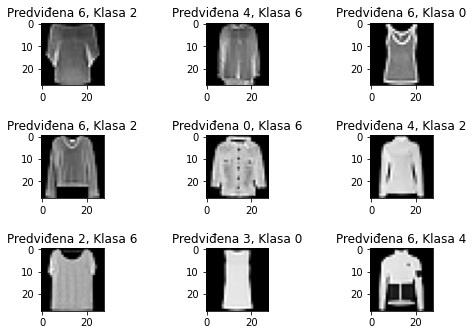

In [10]:
for j in range(0,9):  
    plt.subplot(3,3,j+1)    
    arr = X_test.iloc[diff[j],:].to_numpy()
    arr = arr.reshape(28,28)
    
    plt.subplots_adjust(left=-0.1,
                    bottom=-0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.8)
    
    plt.imshow(arr, cmap = 'gray')
    plt.title("Predviđena {}, Klasa {}".format(y_pred_np[diff[j]], y_test_np[diff[j]]))